In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm
import os.path

import IPython

test_idx=6558

sns.set(color_codes=True)
sns.set_style('white')

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [2]:

# influence mini-batch False
actual_lbfgs = [-5.52624464e-03,  7.02738762e-05,  1.57290697e-03, -6.74724579e-05,
  2.57438421e-03,  6.16967678e-04]
pred_cg = [-5.18374287e-03, -1.41117291e-04,  1.42021214e-03, -2.89855870e-05,
  2.25271832e-03,  6.52311932e-04]
pred_lissa = [-3.27655792e-03, -1.62549192e-04,  5.10932576e-04, -5.59056672e-05,
  1.41495323e-03,  5.84033923e-04]
"""

# influence mini-batch True
actual_lbfgs = [-5.52624464e-03,  7.02738762e-05,  1.57290697e-03, -6.73532486e-05,
  2.57289410e-03,  5.26010990e-04]
pred_cg = [-4.71653956e-03, -1.95164117e-04,  1.30340229e-03, -2.80279138e-05,
  2.28979926e-03,  5.74774309e-04]
pred_lissa = [-4.92387494e-03, -3.17363175e-04,  1.97676607e-03, -4.37816490e-05,
  2.08066507e-03,  5.11078358e-04]
"""

#without damping
pred_grad = [-5.18382333e-03, -1.40975020e-04,  1.41793268e-03, -2.89882530e-05,
  2.25422235e-03,  6.52321989e-04]

#with damping and weight decay
#pred_grad = [-7.83928091e-04,  4.00104393e-04,  1.34998668e-03, -7.59718296e-06,
#  3.42959317e-04,  3.13566034e-04]
#without damping, with weight decay
pred_grad = [-2.21464788e-02,  1.19091537e-03,  4.79130138e-03,  3.89449596e-05,
  1.36581976e-02, -6.58376867e-05]
#with damping and weight decay
warm_grad = [-3.45755219e-02,  1.33258104e-03,  6.81561232e-03,  2.03847885e-05,
  2.02314258e-02, -3.45706940e-05]

def plot_against_pred_lbfgs(data, name):
    plt.scatter(pred_cg,data)
    plt.axes().set_aspect('equal')
    plt.xlim(-0.01,0.01)
    plt.ylim(-0.01,0.01)
    plt.xlabel('LBFGS CG')
    plt.ylabel(name)
    plt.plot([-0.01, 0.01], [-0.01, 0.01], 'k-', alpha=0.2, zorder=1)
    plt.show()

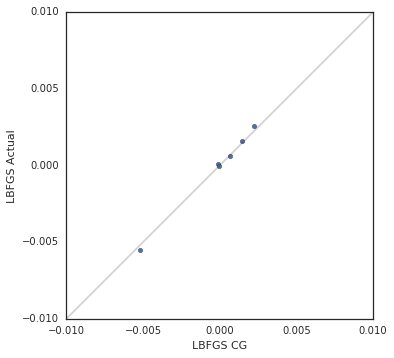

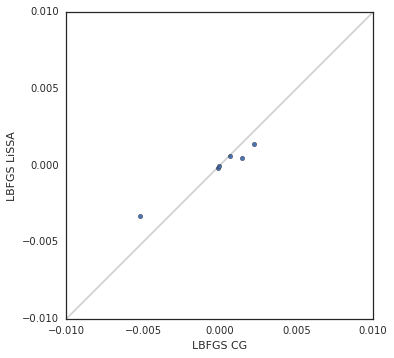

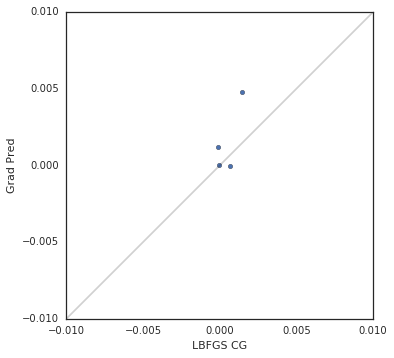

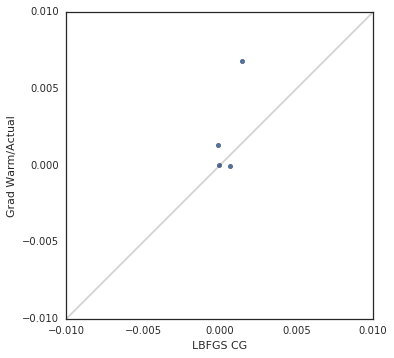

In [3]:
plot_against_pred_lbfgs(actual_lbfgs,'LBFGS Actual')
plot_against_pred_lbfgs(pred_lissa,'LBFGS LiSSA')
plot_against_pred_lbfgs(pred_grad,'Grad Pred')
plot_against_pred_lbfgs(warm_grad,'Grad Warm/Actual')

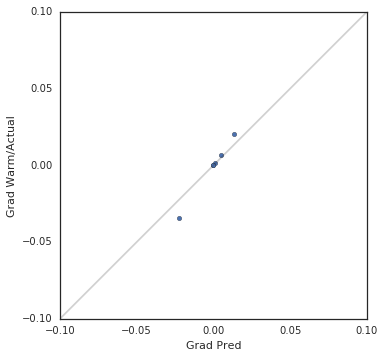

0.9998430805085856


In [4]:
plt.scatter(pred_grad,warm_grad)
plt.axes().set_aspect('equal')
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.xlabel('Grad Pred')
plt.ylabel('Grad Warm/Actual')
plt.plot([-0.1, 0.1], [-0.1, 0.1], 'k-', alpha=0.2, zorder=1)
plt.show()
print(pearsonr(pred_grad,warm_grad)[0])